# Exploratory Data Analysis (EDA)

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the dataset

In [3]:
df = pd.read_excel('heart_disease.xlsx',sheet_name='Heart_disease')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    bool   
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(2), float64(1), int64(5), object(5)
memory usage: 79.9+ KB


### Data Cleaning

In [23]:
df['exang'].replace('FALSE',False,inplace=True)
df['exang'].replace('TURE',True,inplace=True)

### Dividing the features into categorical and numerical columns

In [7]:
numerical_columns = [column for column in df.columns if df[column].dtype != 'O']

In [8]:
numerical_columns

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'num']

In [9]:
categorical_columns = [column for column in df.columns if column not in numerical_columns]

In [10]:
categorical_columns

['sex', 'cp', 'restecg', 'slope', 'thal']

### Checking for nan values

In [11]:
df[numerical_columns].isna().sum()

age          0
trestbps     0
chol         0
fbs          0
thalch       0
exang        0
oldpeak     62
num          0
dtype: int64

- only the oldpeak feature have nan values
---

### Extracting the records where "OldPeak" is null

In [12]:
df[df['oldpeak'].isna()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
9,53,Male,non-anginal,155,175,True,st-t abnormality,160,False,NaN,upsloping,fixed defect,0
371,55,Male,atypical angina,110,214,True,st-t abnormality,180,False,NaN,flat,normal,0
380,69,Male,non-anginal,175,271,False,lv hypertrophy,82,False,NaN,upsloping,reversable defect,0
381,51,Male,asymptomatic,133,218,True,lv hypertrophy,156,True,NaN,upsloping,reversable defect,0
382,58,Male,asymptomatic,131,385,True,lv hypertrophy,126,True,NaN,flat,reversable defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
877,69,Male,asymptomatic,154,289,True,st-t abnormality,128,True,NaN,flat,fixed defect,3
878,64,Male,asymptomatic,134,306,True,st-t abnormality,73,True,NaN,upsloping,reversable defect,3
879,60,Male,non-anginal,186,316,True,st-t abnormality,70,True,NaN,flat,fixed defect,3
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,True,NaN,downsloping,fixed defect,4


### How the "Sex" feature is distributed when "oldpeak" is null

In [13]:
df[df['oldpeak'].isna()]['sex'].value_counts()

sex
Male      61
Female     1
Name: count, dtype: int64

### How the "exang" feature is distributed when "oldpeak" is null

In [14]:
df[df['oldpeak'].isna()]['exang'].value_counts()

exang
True     40
False    22
Name: count, dtype: int64

### Handling the nan values of oldpeak

In [15]:
df['oldpeak'].median()

np.float64(0.5)

#### Distribution of oldpeak

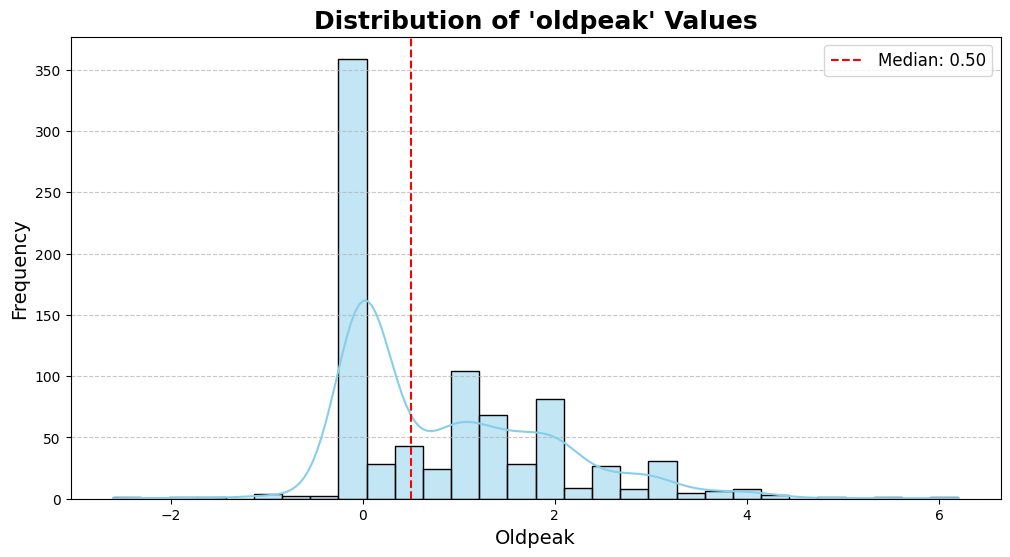

In [16]:
plt.figure(figsize=(12, 6))
sns.histplot(df['oldpeak'], kde=True, bins=30, color="skyblue", edgecolor="black")
plt.axvline(df['oldpeak'].median(), color="red", linestyle="--", label=f"Median: {df['oldpeak'].median():.2f}")
plt.title("Distribution of 'oldpeak' Values", fontsize=18, fontweight="bold")
plt.xlabel("Oldpeak", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.legend(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- most of the values are less than 0
---

#### Boxplot of oldpeak vs sex

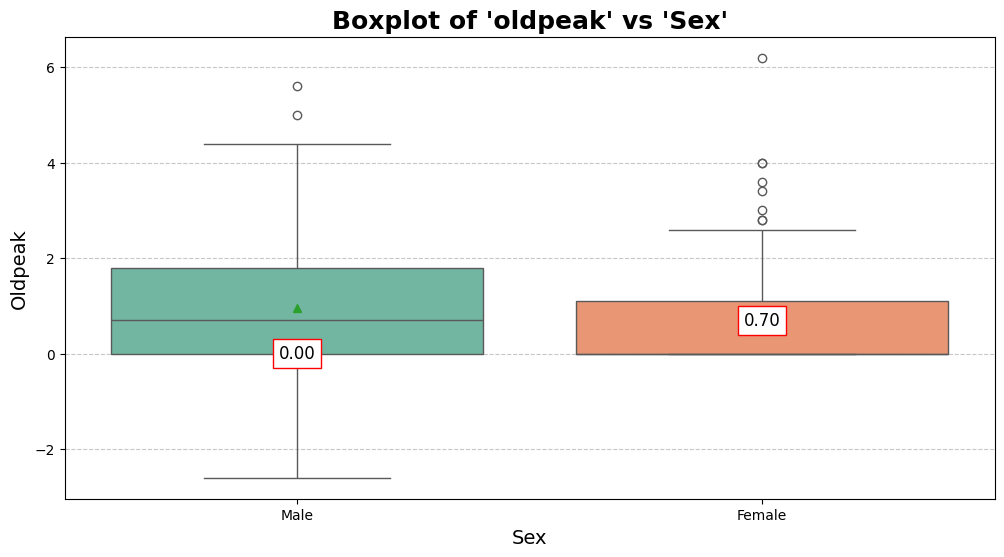

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='sex', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('sex')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'Sex'", fontsize=18, fontweight="bold")
plt.xlabel("Sex", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


- oldpeak values for male is ranging from (-2,6), but for female it is ranging from (0,6)
- females have more oldpeak value
---

#### Boxplot of oldpeak vs exang

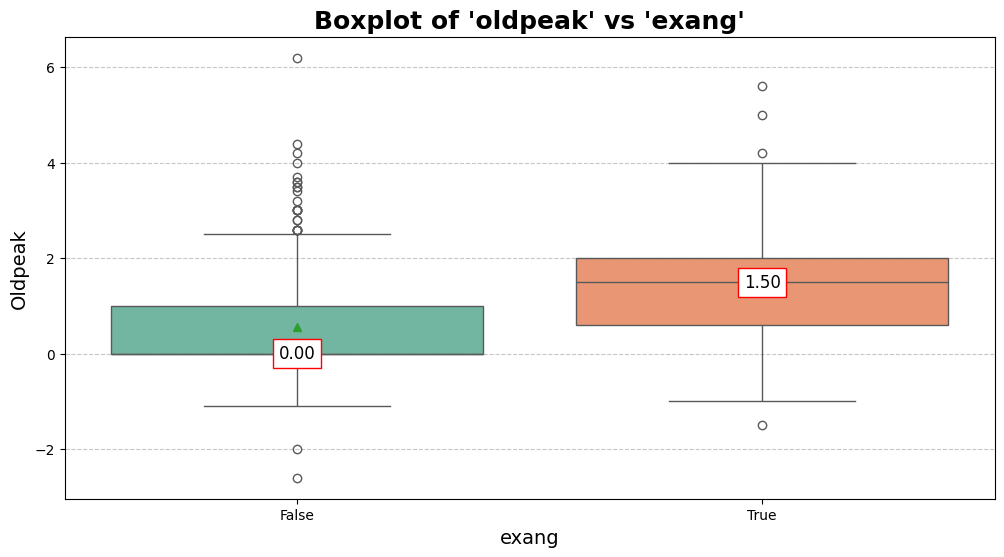

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='exang', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('exang')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'exang'", fontsize=18, fontweight="bold")
plt.xlabel("exang", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- people having exang have more oldpeak
---

#### Boxplot of oldpeak vs slope

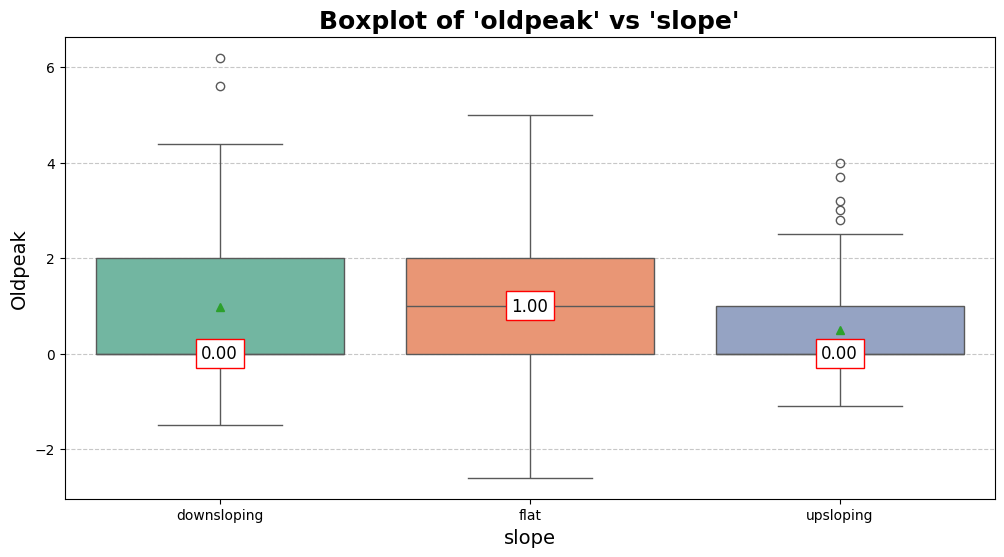

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='slope', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('slope')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'slope'", fontsize=18, fontweight="bold")
plt.xlabel("slope", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- different slope type have varying oldpeaks
---

#### Boxplot of oldpeak vs restecg

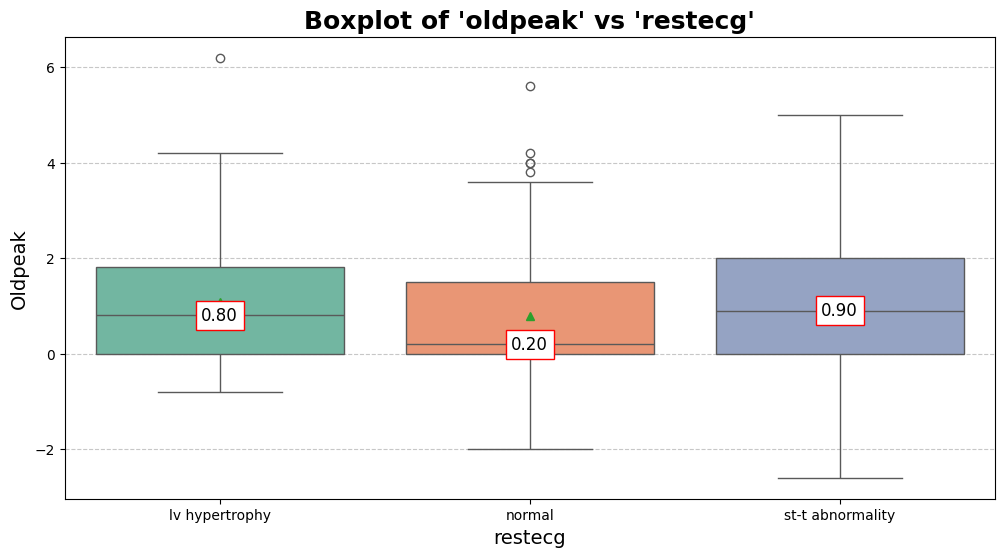

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='restecg', y='oldpeak', palette="Set2", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('restecg')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'restecg'", fontsize=18, fontweight="bold")
plt.xlabel("restecg", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

#### Boxplot of oldpeak vs cp

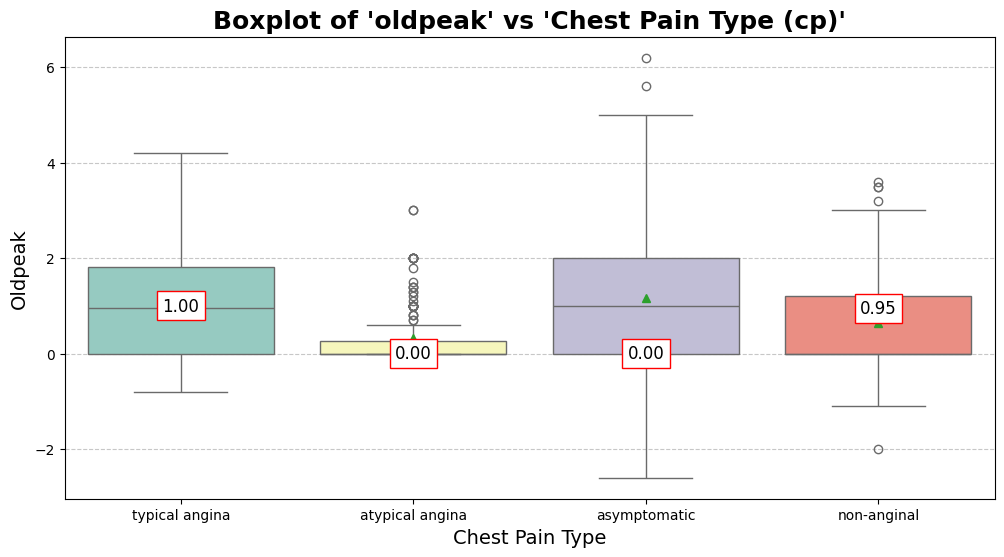

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='cp', y='oldpeak', palette="Set3", showmeans=True, 
            meanprops={"linestyle":"--", "color":"red"})
medians = df.groupby('cp')['oldpeak'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f"{median:.2f}", ha='center', va='center', fontsize=12, color="black", bbox=dict(facecolor="white", edgecolor="red"))
plt.title("Boxplot of 'oldpeak' vs 'Chest Pain Type (cp)'", fontsize=18, fontweight="bold")
plt.xlabel("Chest Pain Type", fontsize=14)
plt.ylabel("Oldpeak", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

- We will be using "restecg" and "sex" features to fill null values of oldpeak.

In [22]:
df.groupby(['sex','restecg'])['oldpeak'].median()

sex     restecg         
Female  lv hypertrophy      0.6
        normal              0.0
        st-t abnormality    0.0
Male    lv hypertrophy      0.8
        normal              0.4
        st-t abnormality    1.0
Name: oldpeak, dtype: float64

- This is how the value of oldpeak is varying with sex and restecg

### Fuction to impute the null values of the oldpeak

In [25]:
def imputeOldpeak(cols):
    oldpeak = cols[0]
    sex = cols[1]
    restecg =  cols[2]
    
    if pd.isnull(oldpeak):
        if sex == "Male":
            if restecg == "lv hypertrophy":
                return 0.8
            
            elif restecg == "normal":
                return 0.4
            
            else:
                return 1.0
            
        else:
            if restecg == "lv hypertrophy":
                return 0.6
            
            elif restecg == "normal":
                return 0.0
            
            else:
                return 0.0
            
    else:
        return oldpeak
            

### Imputing the null values

In [26]:
df['oldpeak'] = df[['oldpeak', 'sex' , 'restecg']].apply(imputeOldpeak,axis=1)

### Checking if we have handled null values

In [27]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

- handled null values successfully

## Data Visualization

### Numerical Columns

In [28]:
numerical_columns

['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'num']

### Fuction to visualize the histrograms

In [35]:
def create_histograms(data, features, figsize=(20, 12)):
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Distribution of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.histplot(data=data, x=feature, kde=True, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
        mean_val, median_val = data[feature].mean(), data[feature].median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
        ax.set_title(f'{feature} Distribution', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
        ax.legend(fontsize=10)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()


### Histrograms

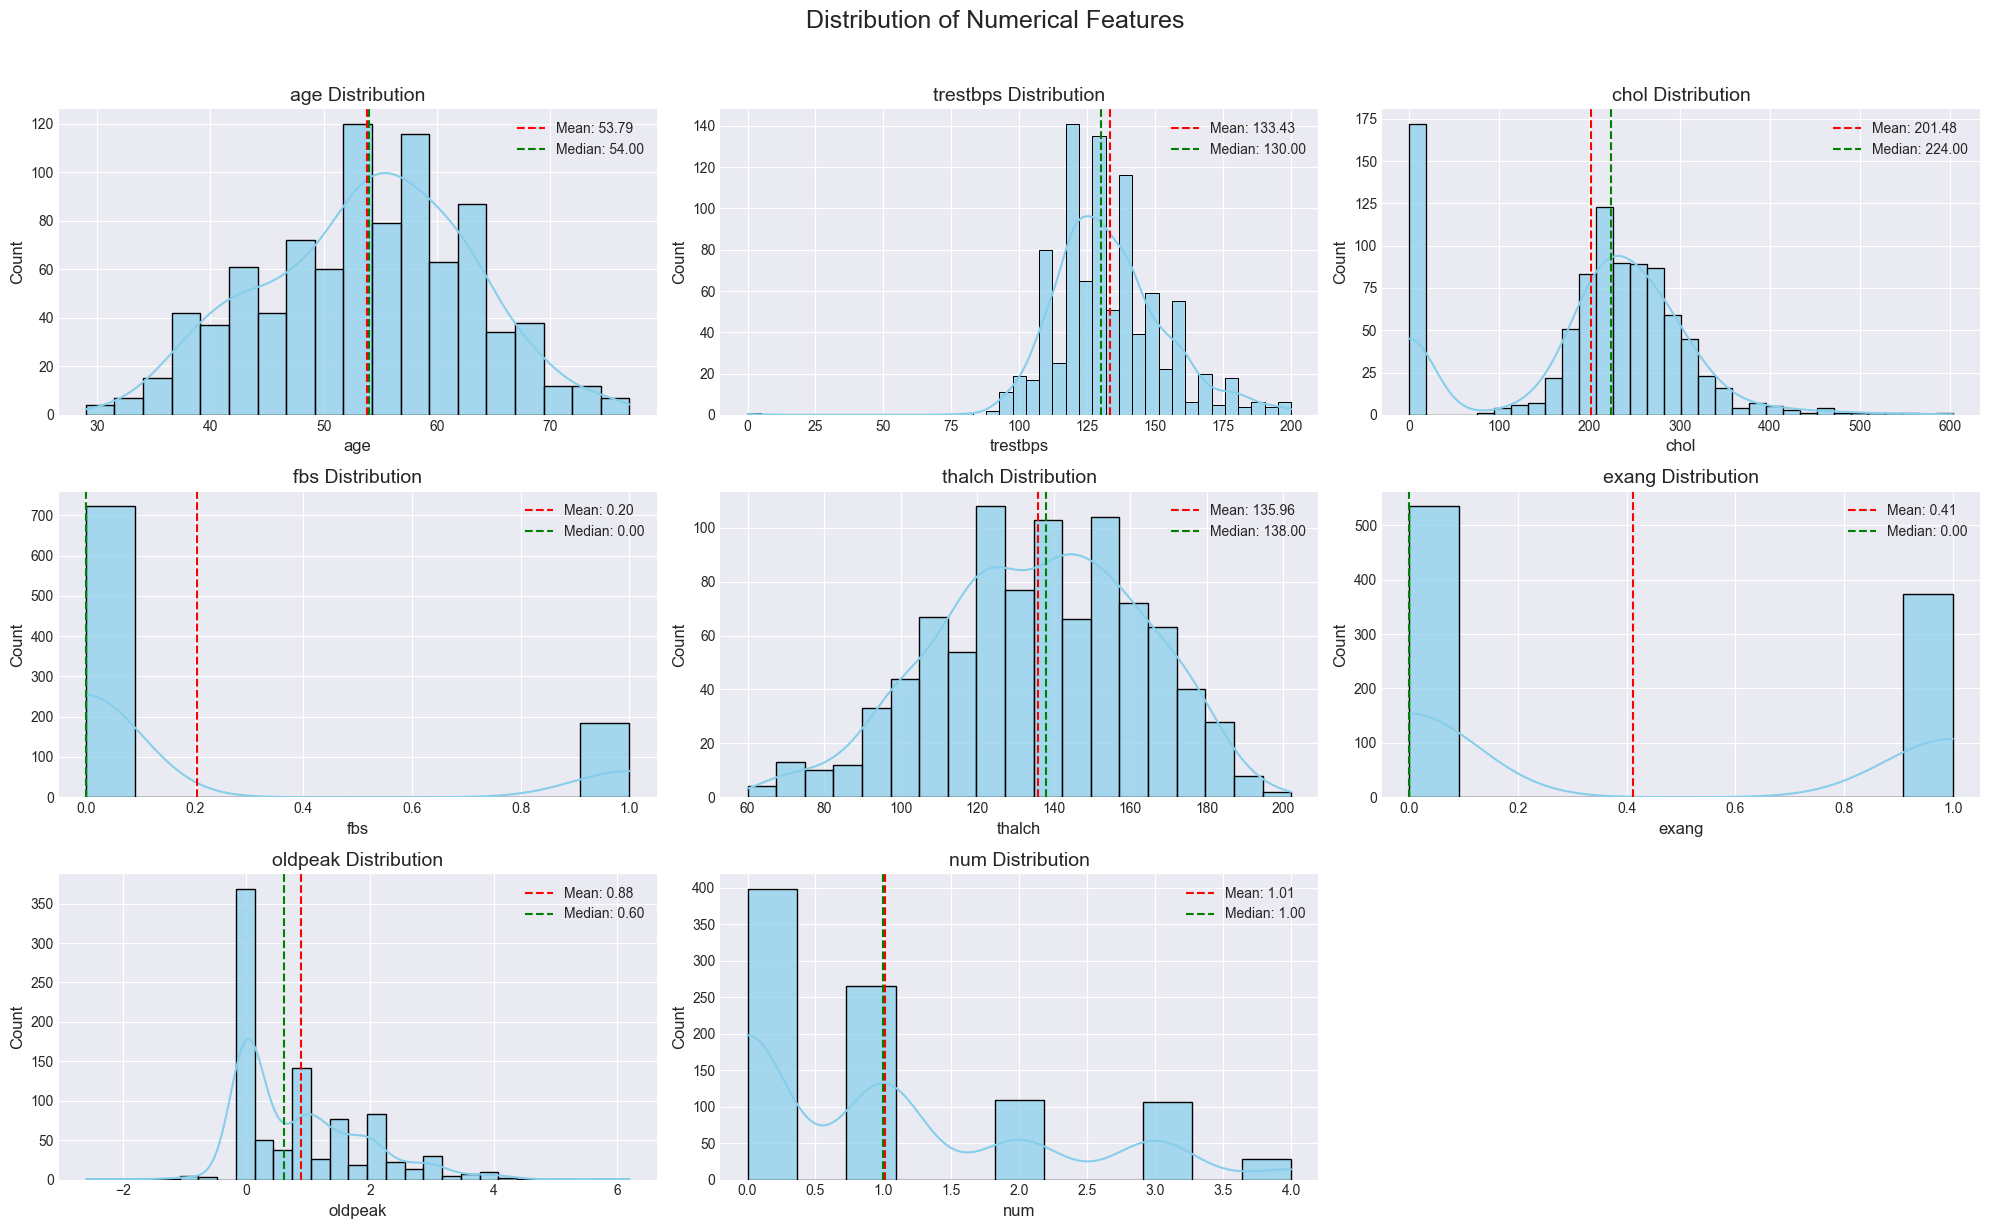

In [36]:
create_histograms(data = df,
                  features= numerical_columns)

### Fuction for boxplots

In [37]:
def create_boxplots(data, features, figsize=(20, 6)):
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(1, len(features), figsize=figsize)
    fig.suptitle('Boxplots of Numerical Features', fontsize=18, y=1.05)
    
    for idx, feature in enumerate(features):
        sns.boxplot(y=data[feature], ax=axes[idx], color='lightblue')
        axes[idx].set_title(f'{feature}', fontsize=14)
        axes[idx].set_ylabel('Value', fontsize=12)
        median_val = data[feature].median()
        axes[idx].text(-0.2, median_val, f'{median_val:.2f}', fontsize=10, verticalalignment='center')
    
    plt.tight_layout()

### Boxplots

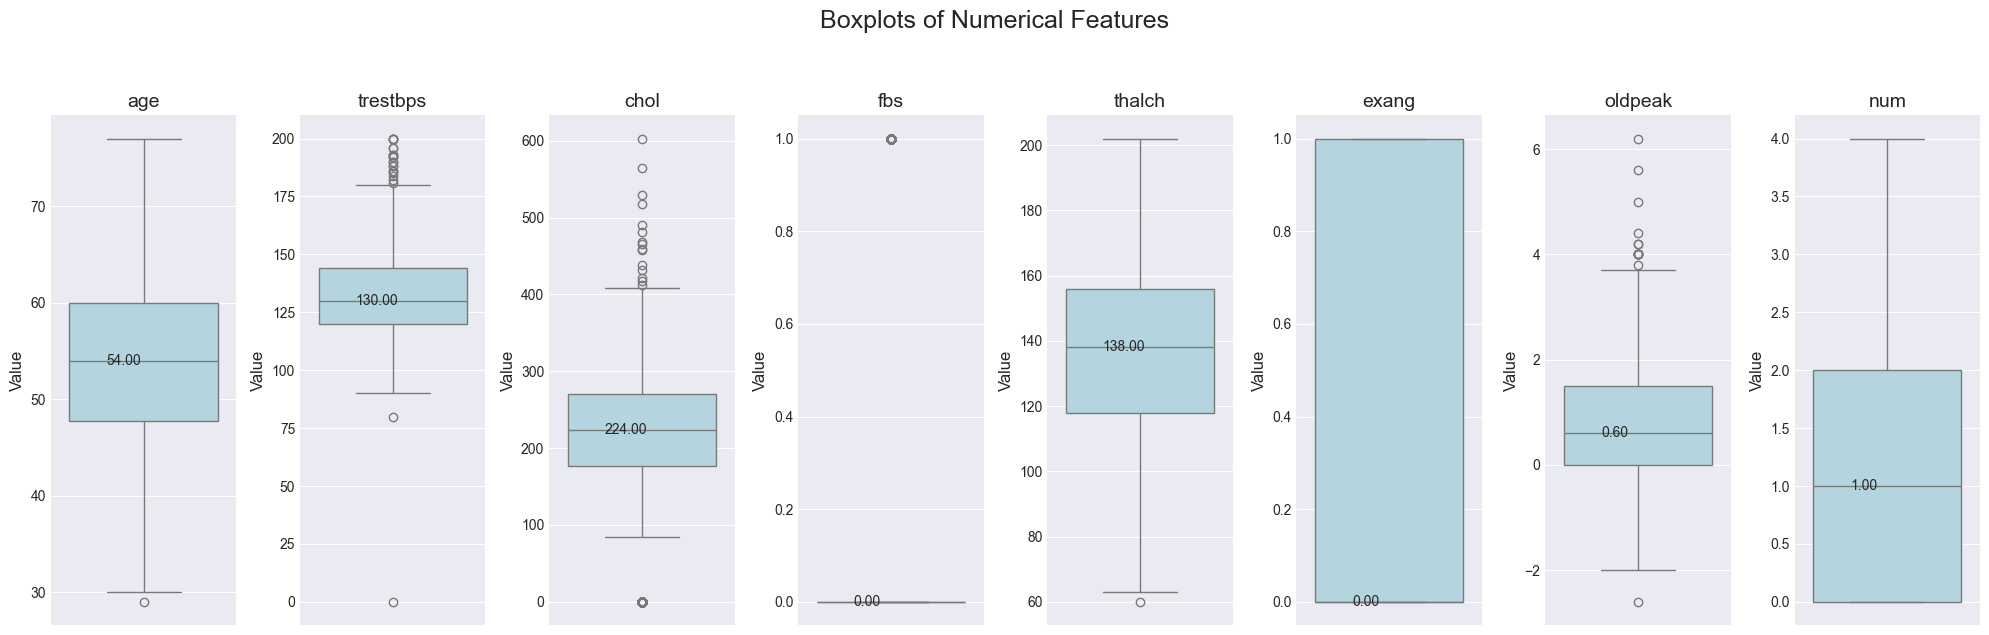

In [38]:
create_boxplots(data = df,
                features= numerical_columns)

### Fuction for kde plots

In [42]:
def create_kde_plots(data, features, figsize=(20, 12)):
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Kernel Density Estimation of Numerical Features', fontsize=18, y=1.02)
    
    for idx, feature in enumerate(features):
        row, col = divmod(idx, n_cols)
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.kdeplot(data=data[feature], ax=ax, fill=True, color='purple', alpha=0.5)
        sns.rugplot(data=data[feature], ax=ax, color='purple', alpha=0.5)
        mean_val, std_val, skew_val = data[feature].mean(), data[feature].std(), data[feature].skew()
        stats_text = f'Mean: {mean_val:.2f}\nStd: {std_val:.2f}\nSkew: {skew_val:.2f}'
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes, fontsize=10, verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))
        ax.set_title(f'{feature} Density', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Density', fontsize=12)
    
    for idx in range(n_features, n_rows * n_cols):
        row, col = divmod(idx, n_cols)
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    
    plt.tight_layout()

### Kde Plot

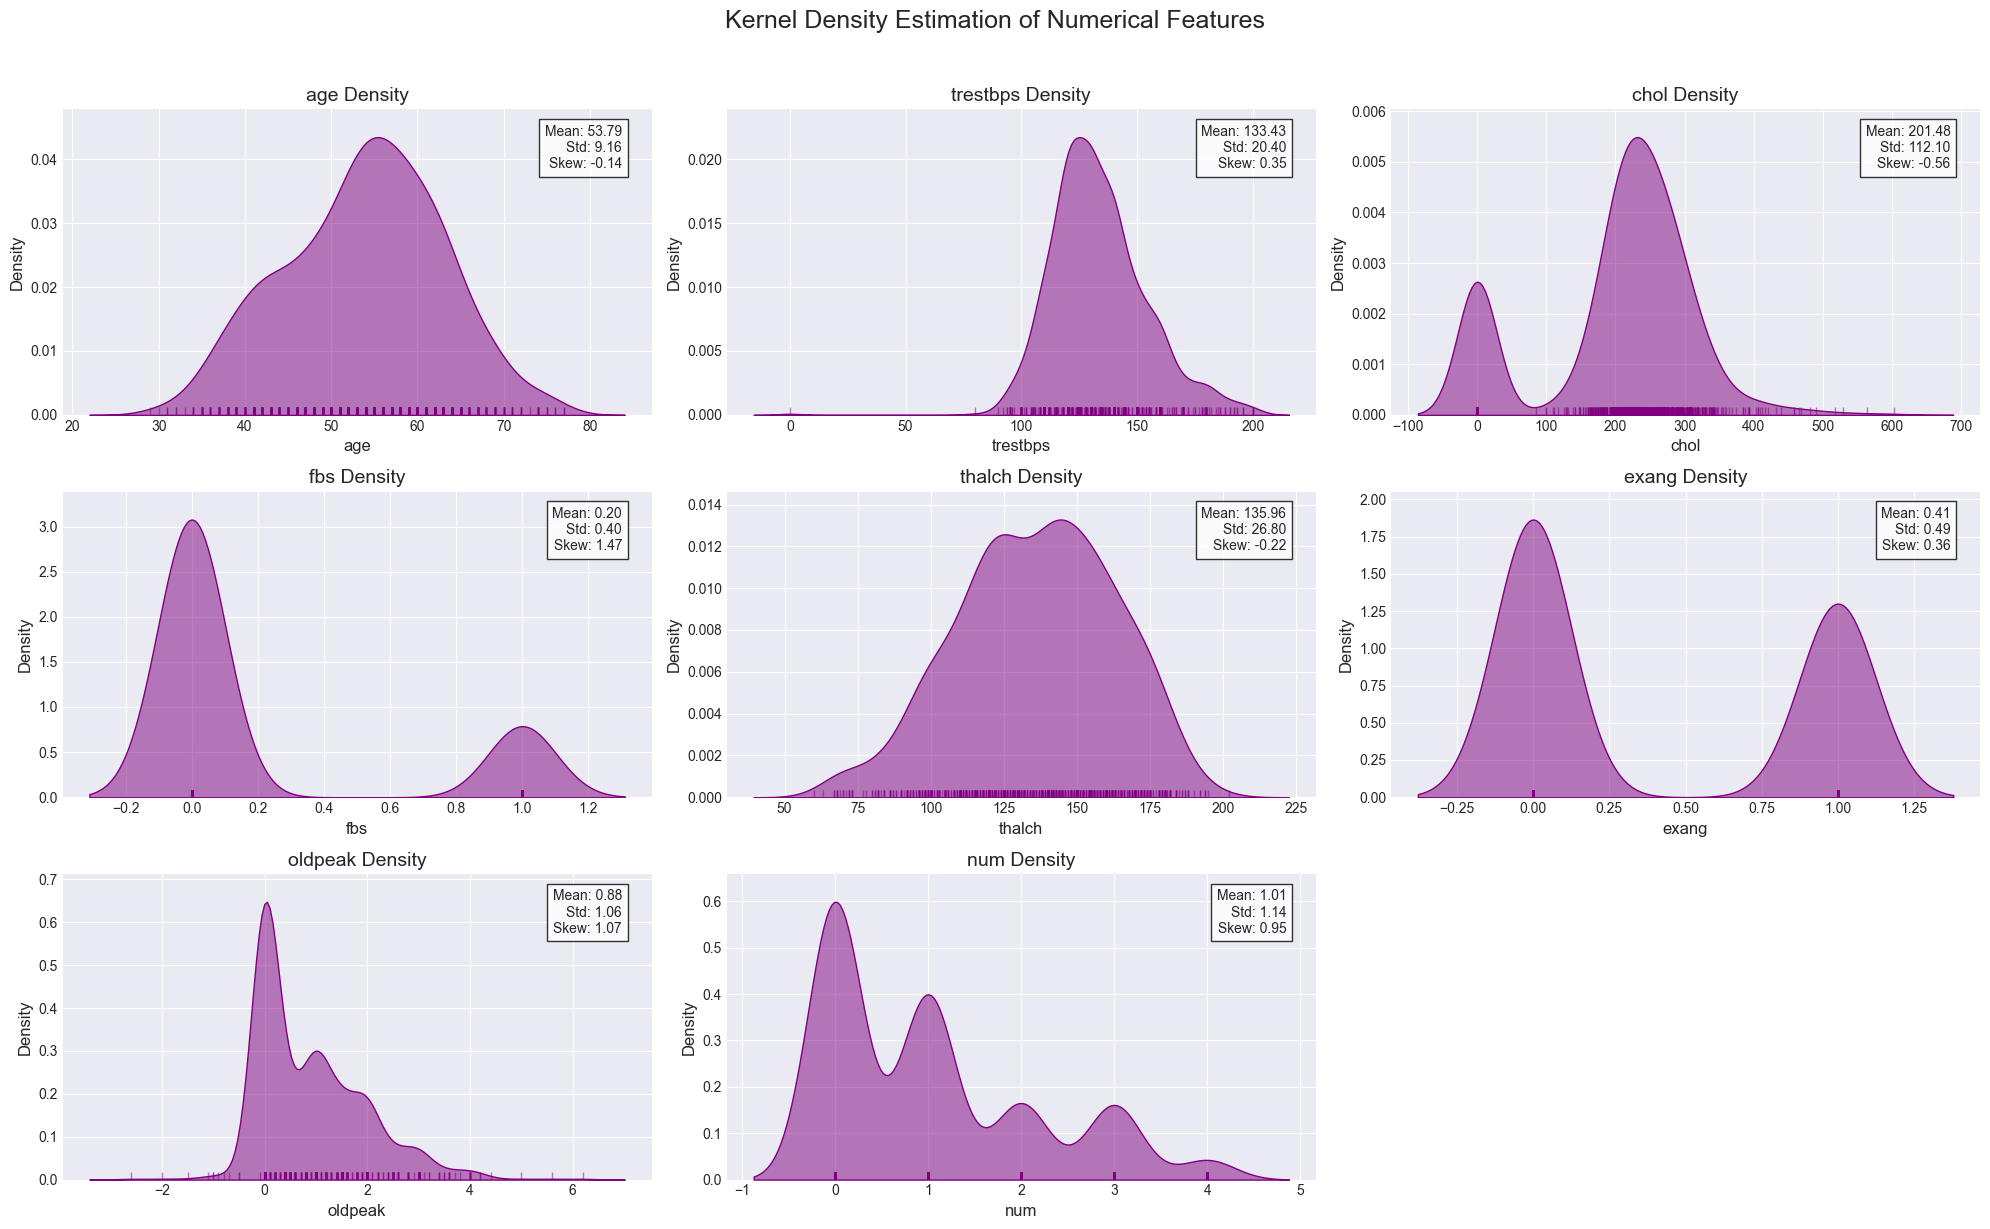

In [43]:
create_kde_plots(data = df,
                features= numerical_columns)

### Function for correlation map/heat map

In [44]:
def create_correlation_heatmap(data, features, figsize=(12, 10)):
    plt.style.use('seaborn-v0_8-darkgrid')
    corr_matrix = data[features].corr()
    fig, ax = plt.subplots(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, fmt='.2f', square=True, linewidths=0.5, cbar_kws={'shrink': 0.8}, annot_kws={'size': 10})
    plt.title('Correlation Heatmap of Numerical Features', fontsize=18, pad=20)

### Heatmap

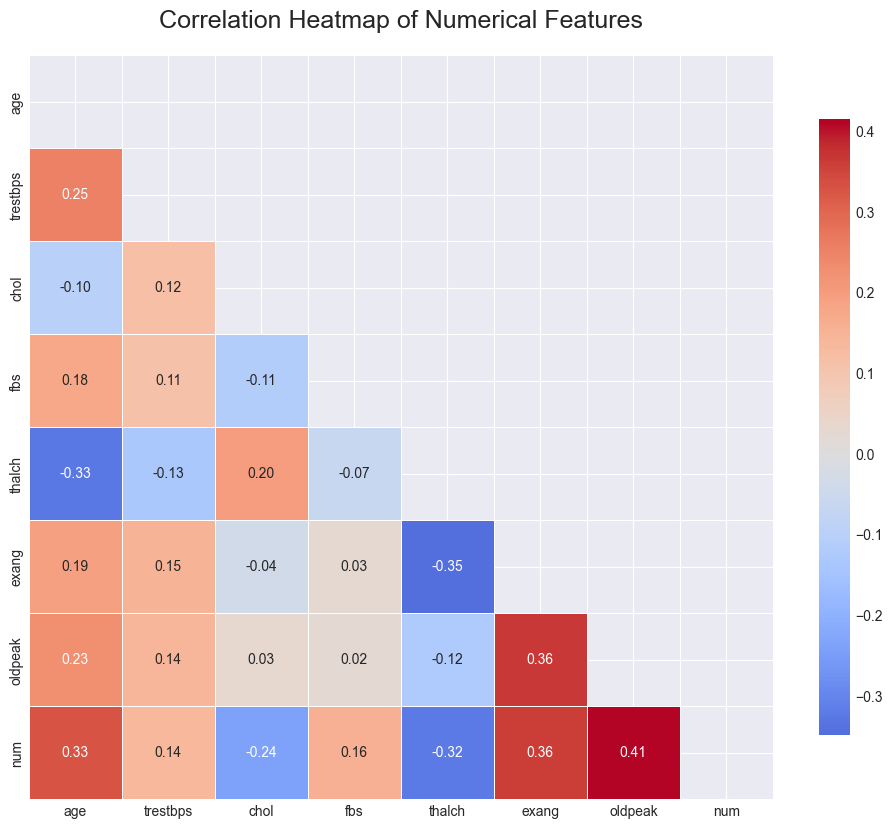

In [45]:
create_correlation_heatmap(data = df,
                           features= numerical_columns)

### Categorical columns

In [69]:
categorical_columns

['sex', 'cp', 'restecg', 'slope', 'thal', 'exang', 'fbs']

### Fuction for bar plots

In [70]:
def create_bar_plots(data, features, figsize=(20, 12)):
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Distribution of Categorical Features', fontsize=16, y=1.02)
    for idx, feature in enumerate(features):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        value_counts = data[feature].value_counts()
        percentages = data[feature].value_counts(normalize=True) * 100
        bars = sns.barplot(x=value_counts.index, y=value_counts.values, ax=ax, palette='viridis')
        for i, (count, percentage) in enumerate(zip(value_counts, percentages)):
            ax.text(i, count, f'{count}\n({percentage:.1f}%)', ha='center', va='bottom')
        ax.set_title(f'{feature} Distribution', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
    for idx in range(n_features, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    plt.tight_layout()

### Bar plots

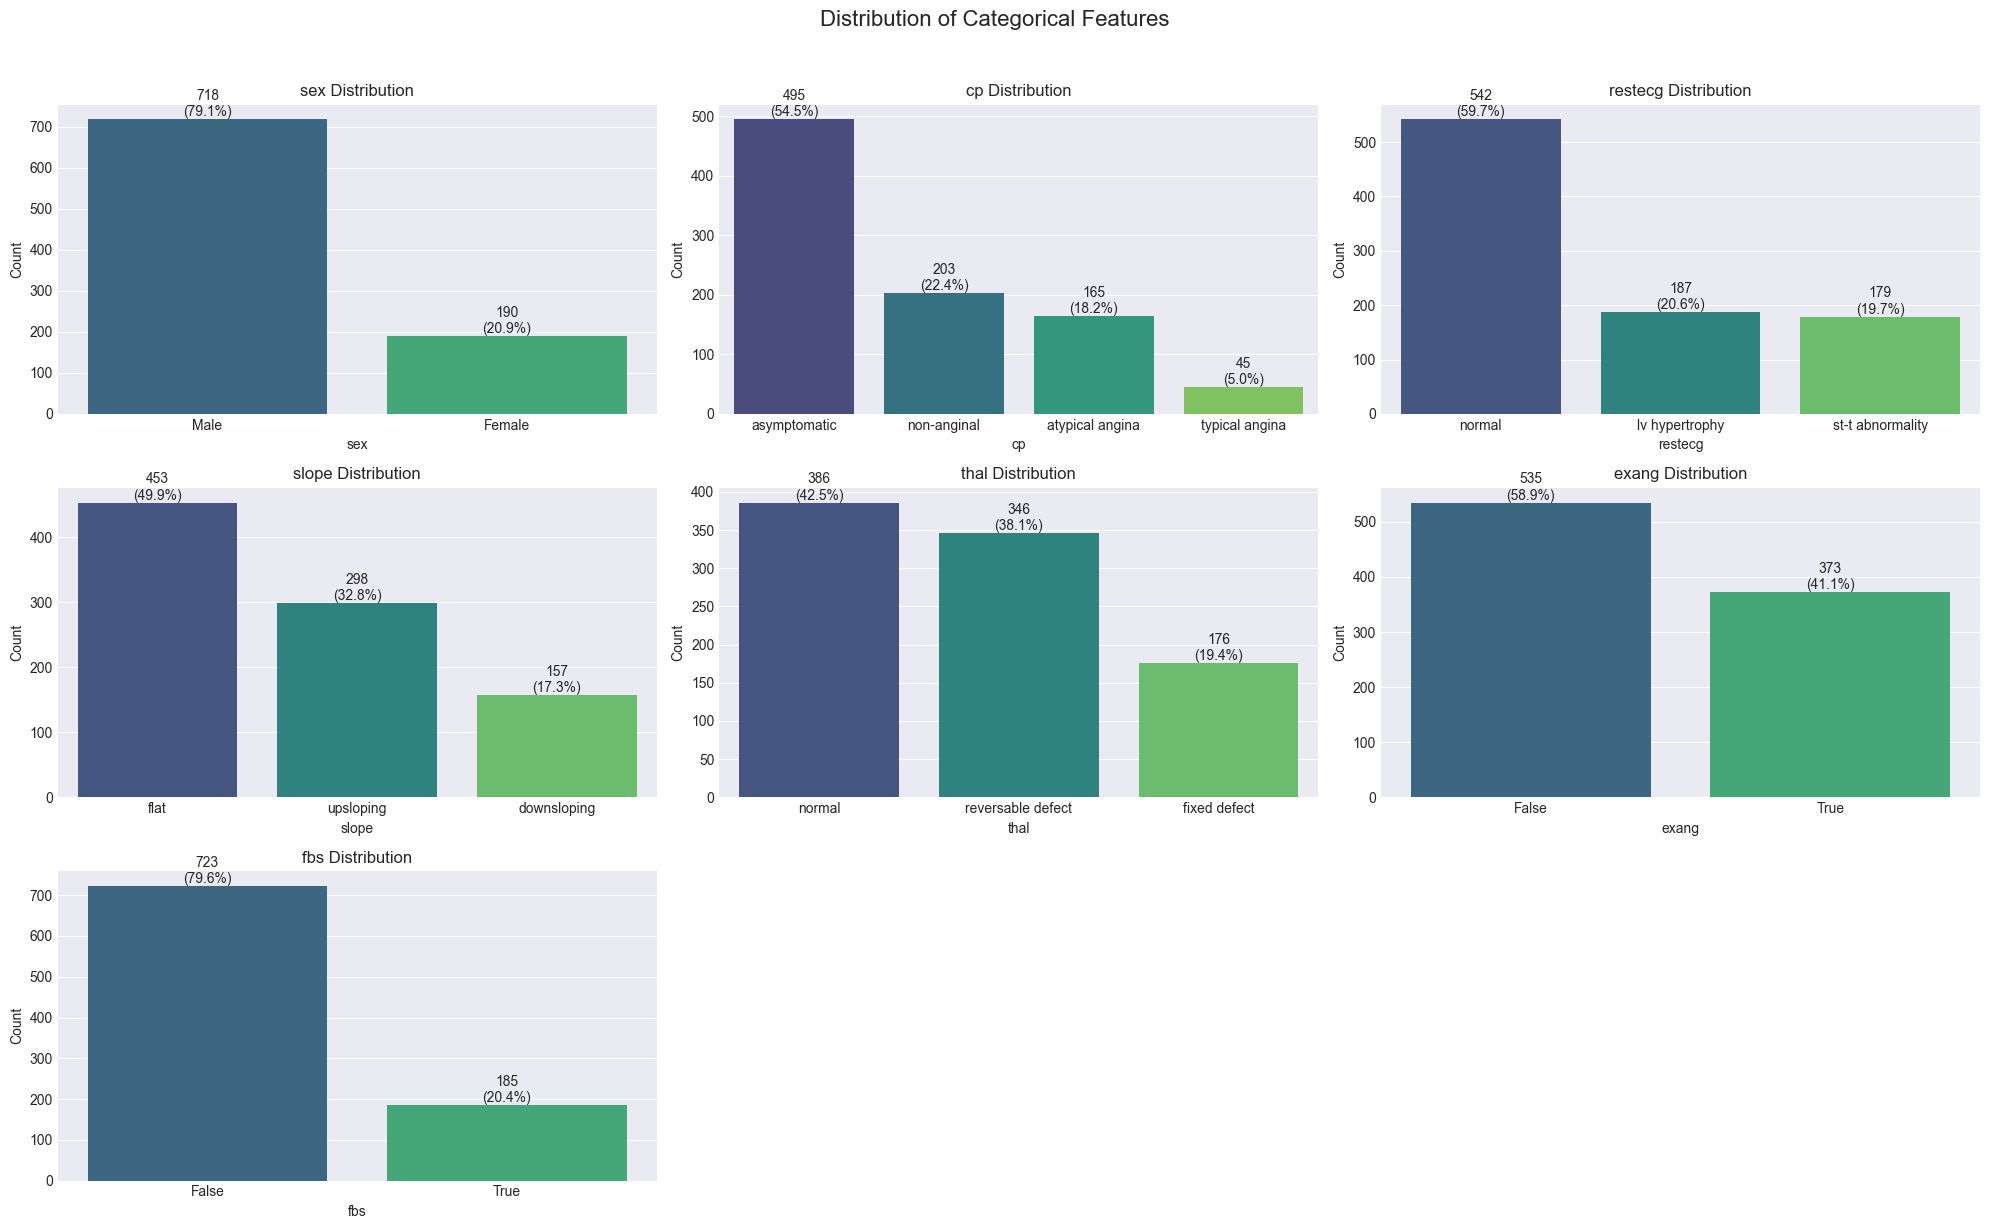

In [71]:
create_bar_plots(data= df,
                 features= categorical_columns)

### Fuction for stacked bars

In [53]:
def create_stacked_bars(data, features, target_col='num', figsize=(20, 8)):
    plt.style.use('seaborn-v0_8-darkgrid')
    fig, axes = plt.subplots(1, len(features), figsize=figsize)
    fig.suptitle('Categorical Features vs Target Variable', fontsize=16, y=1.05)
    for idx, feature in enumerate(features):
        props = pd.crosstab(data[feature], data[target_col], normalize='index') * 100
        props.plot(kind='bar', stacked=True, ax=axes[idx], colormap='viridis')
        axes[idx].set_title(f'{feature} vs Target', fontsize=12)
        axes[idx].set_xlabel(feature, fontsize=10)
        axes[idx].set_ylabel('Percentage (%)', fontsize=10)
        axes[idx].legend(title='Target', bbox_to_anchor=(1.05, 1))
        for c in axes[idx].containers:
            axes[idx].bar_label(c, fmt='%.1f%%', label_type='center', color='red')
    plt.tight_layout()

### Stacked Bars

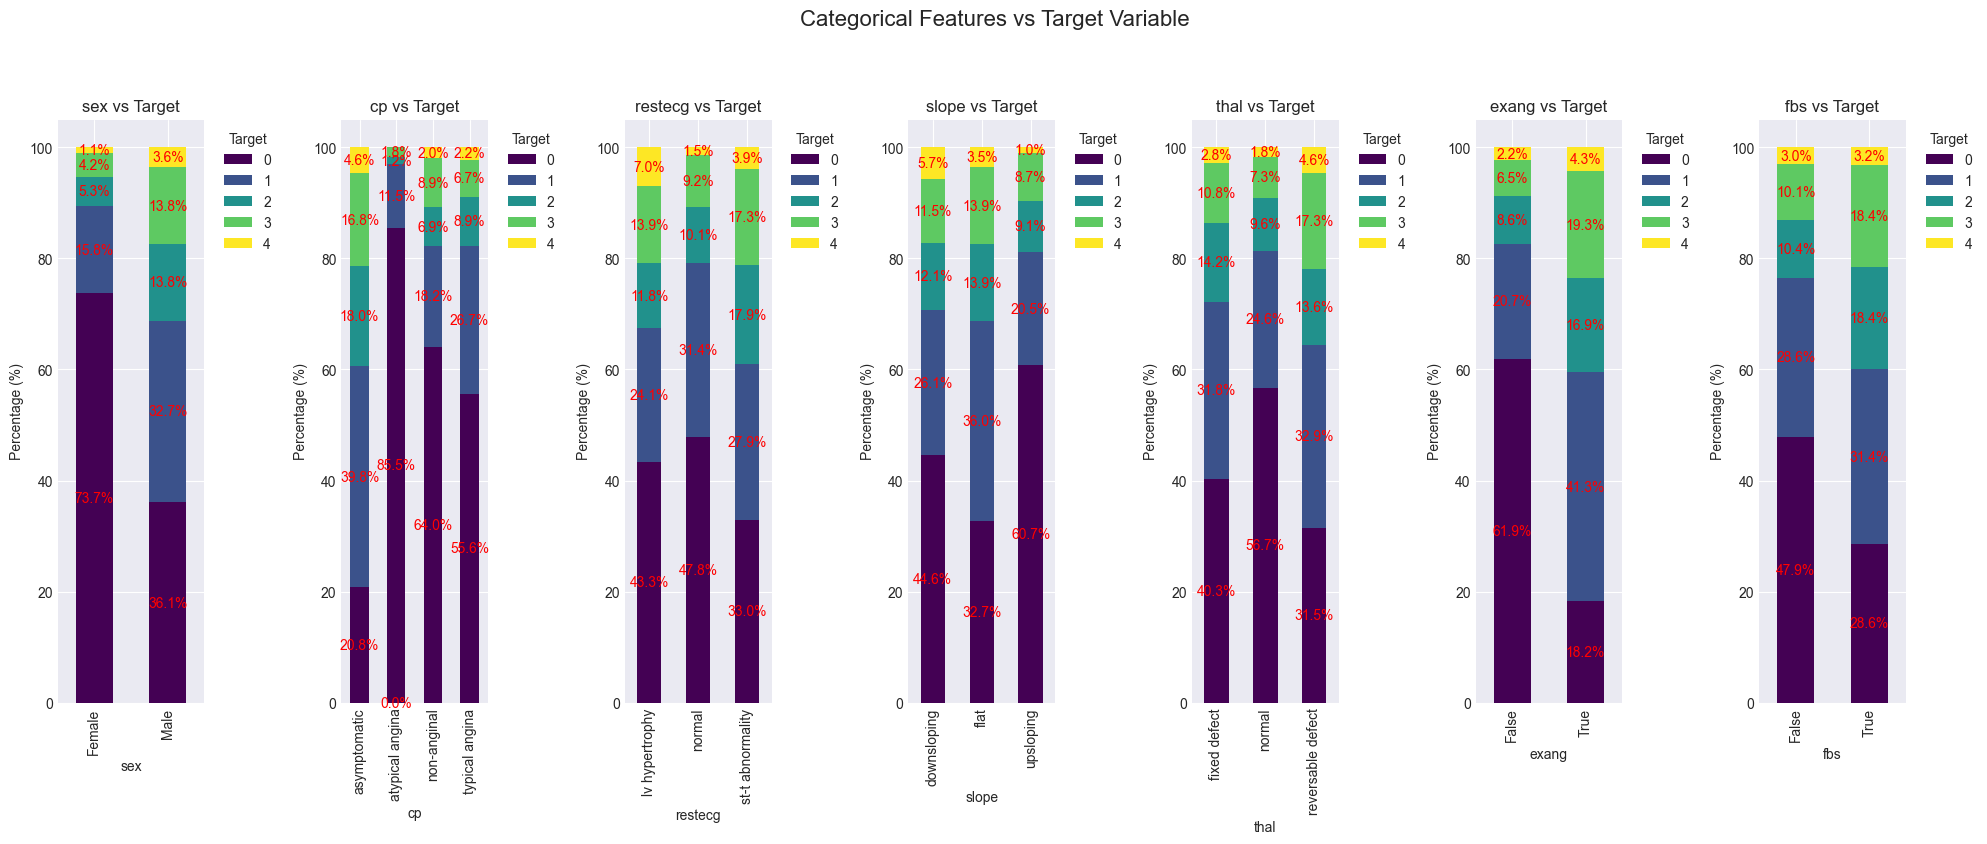

In [72]:
create_stacked_bars(data= df,
                    features= categorical_columns)

### Function for Heat map 

In [55]:
def create_heatmap_categorical(data, features, figsize=(12, 10)):
    plt.style.use('seaborn-v0_8-darkgrid')
    def cramers_v(x, y):
        confusion_matrix = pd.crosstab(x, y)
        chi2 = stats.chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum().sum()
        min_dim = min(confusion_matrix.shape) - 1
        return np.sqrt(chi2 / (n * min_dim))
    n_features = len(features)
    corr_matrix = np.zeros((n_features, n_features))
    for i in range(n_features):
        for j in range(n_features):
            corr_matrix[i, j] = cramers_v(data[features[i]], data[features[j]])
    fig, ax = plt.subplots(figsize=figsize)
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', xticklabels=features, yticklabels=features, center=0, fmt='.2f', square=True, linewidths=0.5, cbar_kws={"shrink": .5})
    plt.title("Cramer's V Correlation Between Categorical Features", fontsize=16, pad=20)

### HeatMap

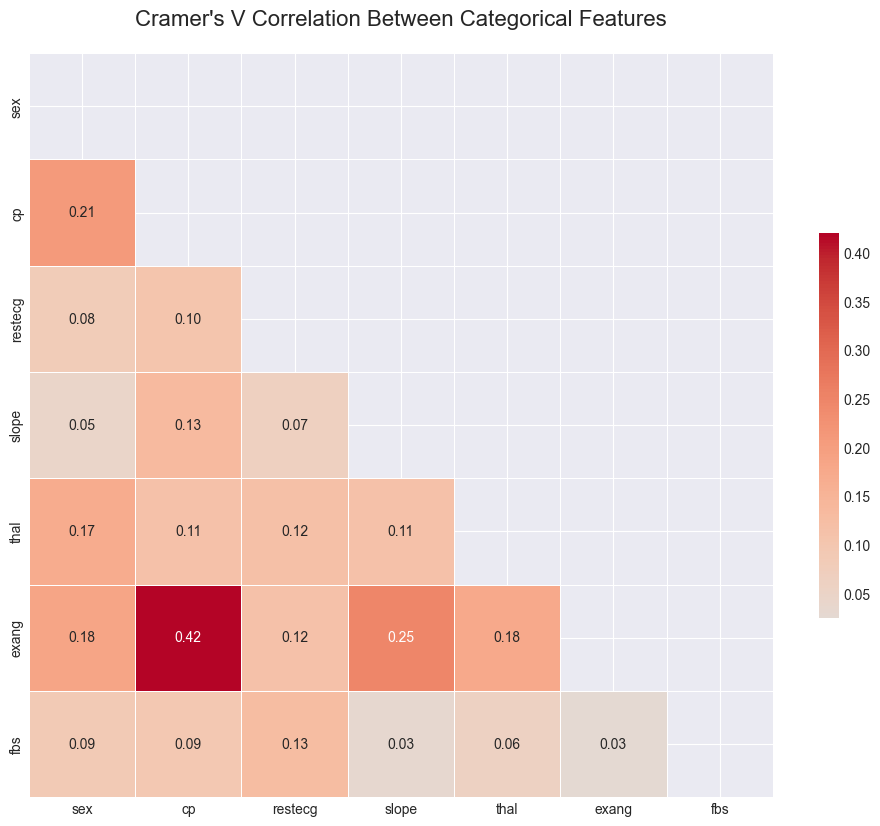

In [73]:
create_heatmap_categorical(data= df,
                           features=categorical_columns)

### Function for mosaic plots

In [57]:
def create_mosaic_plots(data, features, figsize=(20, 12)):
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_plots = (n_features * (n_features - 1)) // 2
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Mosaic Plots of Categorical Features', fontsize=16, y=1.02)
    plot_idx = 0
    for i in range(n_features):
        for j in range(i + 1, n_features):
            if plot_idx < n_rows * n_cols:
                row = plot_idx // n_cols
                col = plot_idx % n_cols
                ax = axes[row, col] if n_rows > 1 else axes[col]
                cont_table = pd.crosstab(data[features[i]], data[features[j]])
                sns.heatmap(cont_table, annot=True, fmt='d', cmap='YlGnBu', ax=ax, cbar=False)
                ax.set_title(f'{features[i]} vs {features[j]}', fontsize=12)
                plot_idx += 1
    for idx in range(plot_idx, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    plt.tight_layout()

### Mosaic Plots

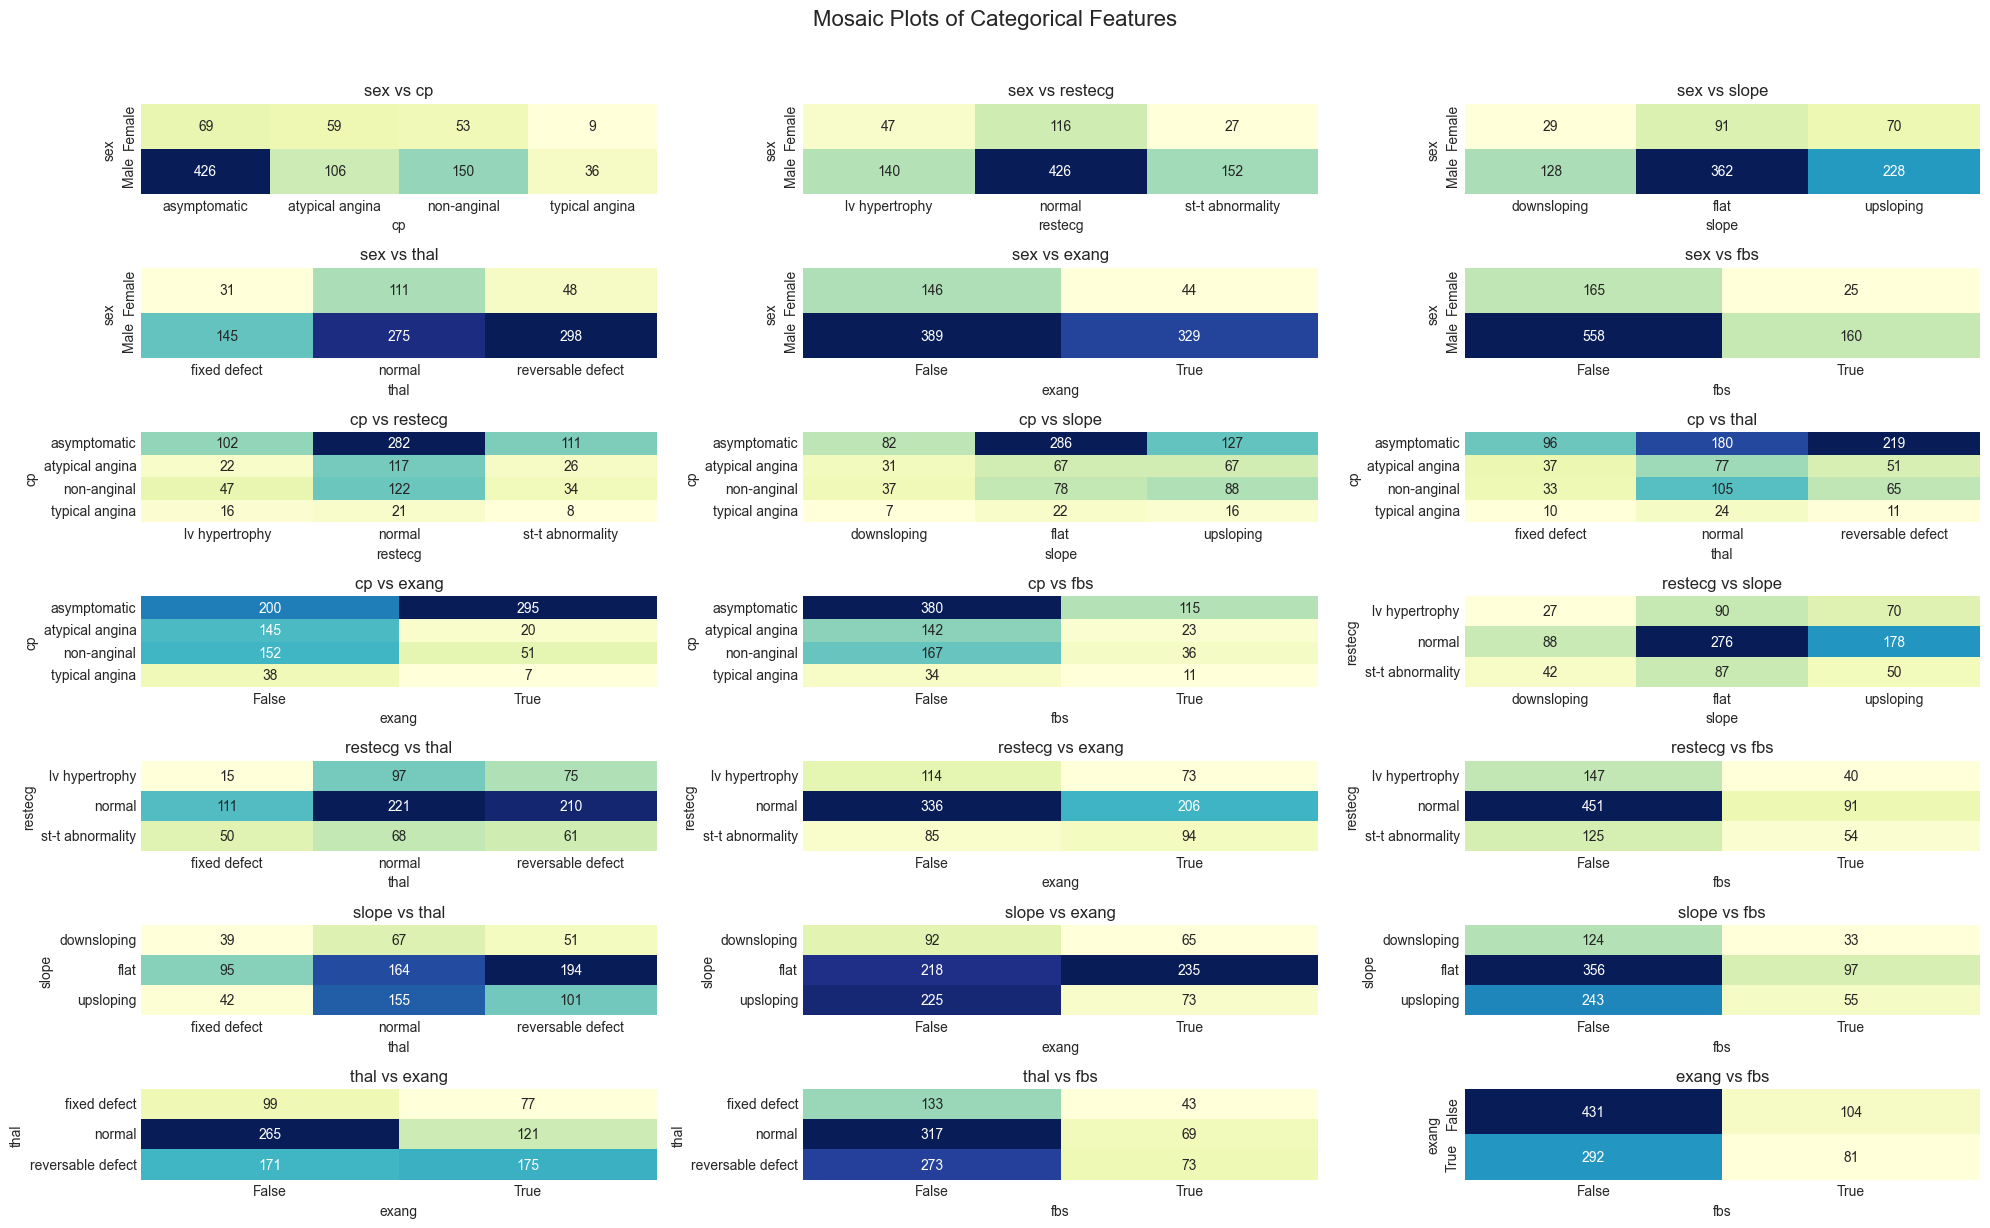

In [74]:
create_mosaic_plots(data= df,
                    features= categorical_columns)

### Function for box plots

In [59]:
def create_box_plots(data, features, target_col='num', figsize=(20, 12)):
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    fig.suptitle('Box Plots of Categorical Features vs Target', fontsize=16, y=1.02)
    for idx, feature in enumerate(features):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        sns.boxplot(x=data[feature], y=data[target_col], ax=ax, palette='viridis')
        ax.set_title(f'{feature} vs {target_col}', fontsize=12)
        ax.set_xlabel(feature, fontsize=10)
        ax.set_ylabel(target_col, fontsize=10)
    for idx in range(n_features, n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])
    plt.tight_layout()

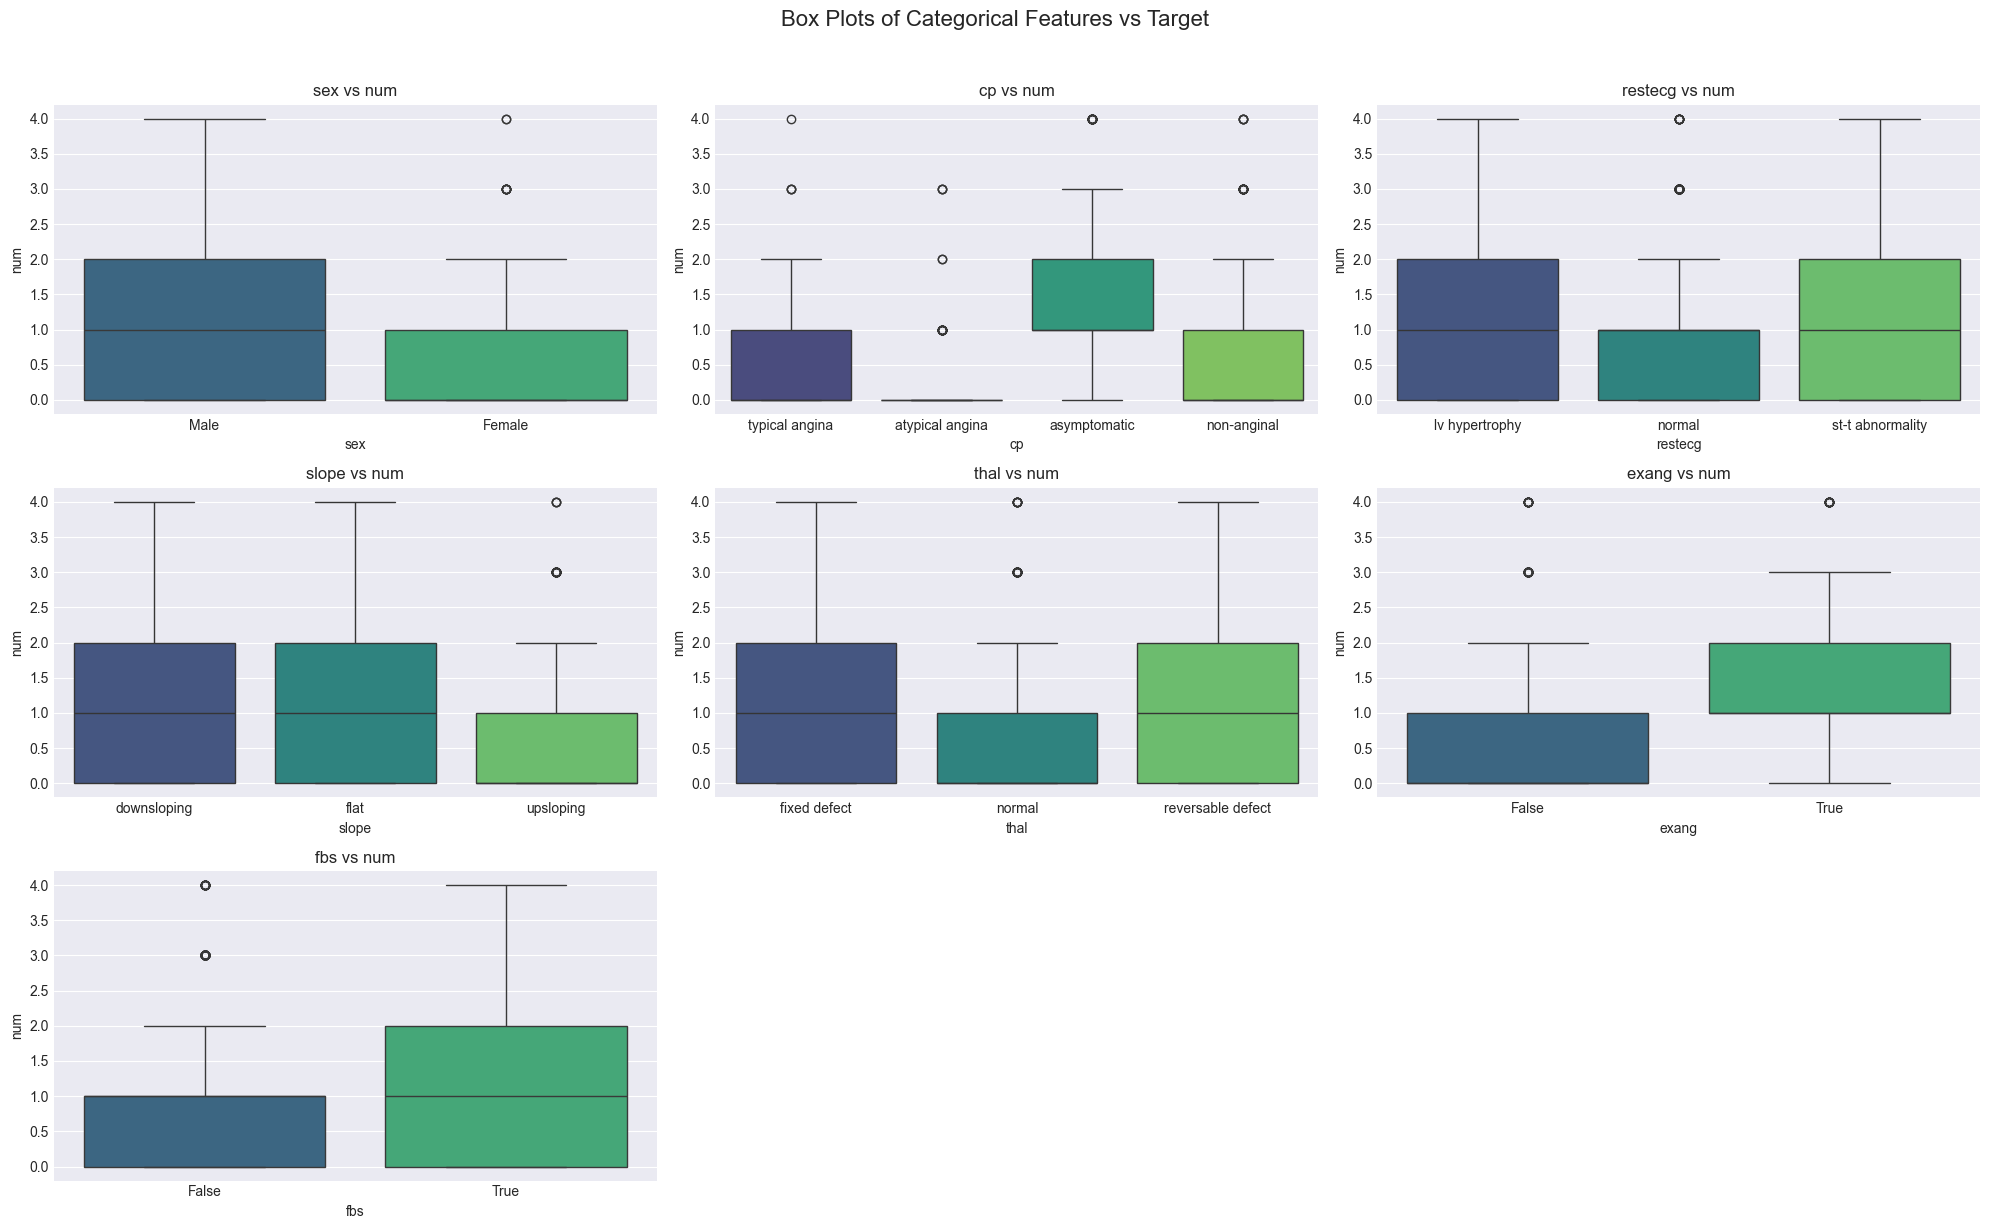

In [75]:
create_box_plots(data= df,
                 features= categorical_columns)

### Function for pie chart

In [61]:
def create_pie_charts(data, features, figsize=(20, 12)):
    plt.style.use('seaborn-v0_8-darkgrid')
    n_features = len(features)
    n_cols = 3
    n_rows = (n_features + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, subplot_kw={'aspect': 'equal'})
    fig.suptitle('Pie Charts of Categorical Features', fontsize=16, y=1.02)

    for idx, feature in enumerate(features):
        row = idx // n_cols
        col = idx % n_cols
        ax = axes[row, col] if n_rows > 1 else axes[col]
        value_counts = data[feature].value_counts()
        percentages = data[feature].value_counts(normalize=True) * 100
        labels = [f'{label}\n({percentage:.1f}%)' for label, percentage in zip(value_counts.index, percentages)]
        ax.pie(value_counts, labels=labels, autopct='%.1f%%', startangle=90, colors=sns.color_palette('viridis', len(value_counts)))
        ax.set_title(f'{feature} Distribution', fontsize=12)

    for idx in range(len(features), n_rows * n_cols):
        row = idx // n_cols
        col = idx % n_cols
        fig.delaxes(axes[row, col] if n_rows > 1 else axes[col])

    plt.tight_layout()

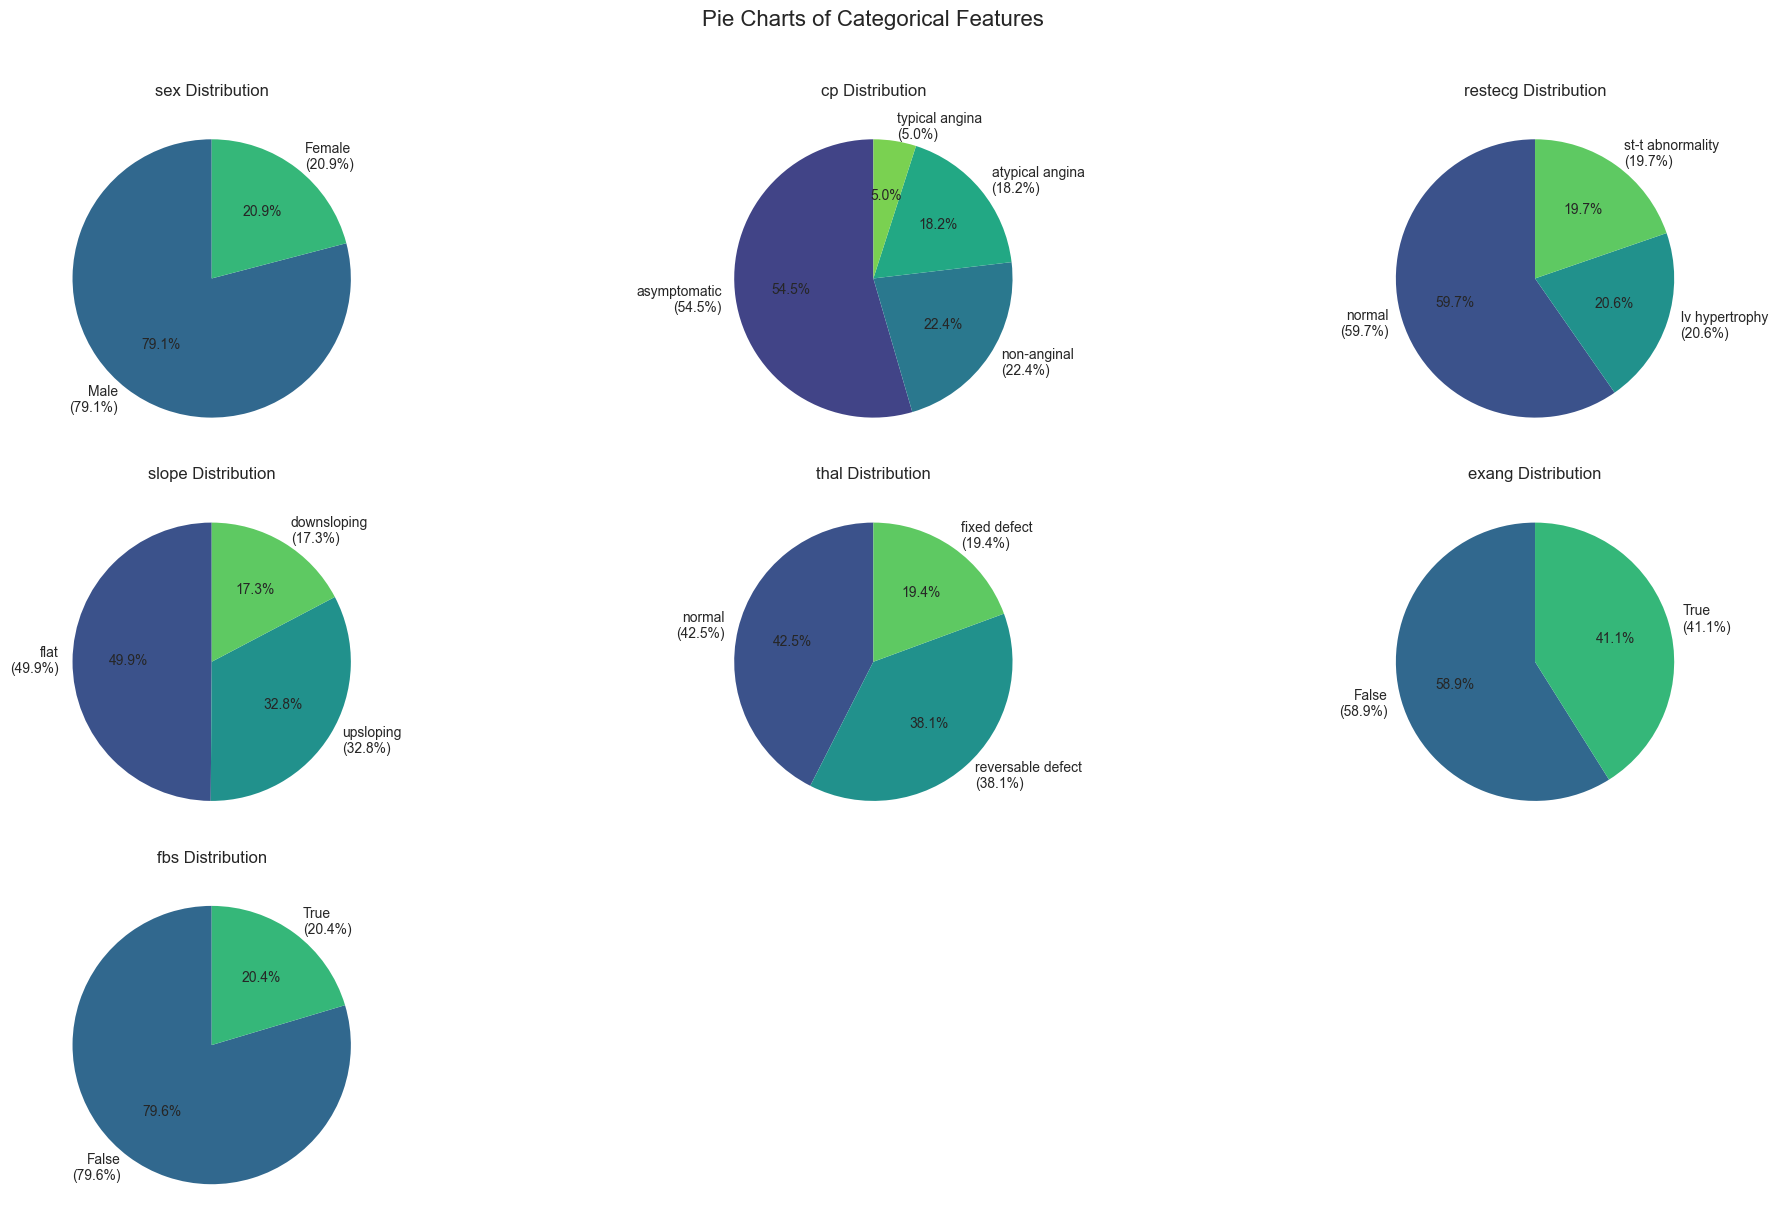

In [76]:
create_pie_charts(data= df,
                  features= categorical_columns)

### Feature Engineering

---
- We will be using the scikit-learn library to train our decision tree classifier
- but the requirement of this library is this that all the features should be numerical
- so we will encode the categorical variables

### Function for label encoding

In [77]:
from sklearn.preprocessing import LabelEncoder

In [78]:
def label_encode_columns(data, features):
    label_encoders = {}
    for feature in features:
        le = LabelEncoder()
        data[feature] = le.fit_transform(data[feature])
        label_encoders[feature] = le
    return data, label_encoders

In [79]:
df, encoders = label_encode_columns(data = df,
                                    features= categorical_columns)

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0


In [81]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.3,0,0,0
1,41,1,1,135,203,0,1,132,0,0.0,1,0,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0,0
3,52,1,3,118,186,0,0,190,0,0.0,1,0,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,0,1.5,2,2,4
904,62,1,0,166,170,0,2,120,1,3.0,1,2,4
905,56,1,2,170,0,0,0,123,1,2.5,0,1,4
906,56,1,2,144,208,1,2,105,1,1.0,0,0,4


### Saving the cleaned and featured excel data file

In [83]:
def save_to_csv(df, file_name):
    
    df.to_csv(file_name, index=False)
    print(f"Data saved successfully to {file_name}")

In [85]:
save_to_csv(df= df, file_name= "cleaned_heart_disease_data.csv")

Data saved successfully to cleaned_heart_disease_data.csv
